In [1]:
import numpy as np
import torch
from xgboost import XGBClassifier
import xgboost
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import metrics
from utils import *
from sklearn.model_selection import KFold
from utils import *
import random
from get_sim import *
from sklearn.linear_model import LogisticRegression

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',  # 使用颜色编码定义颜色
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:

random.seed(1)
k1 = 140  # mic
k2 = 5  # dis
A = pd.read_csv('./peryton/sign_final_ass.csv', index_col=0).to_numpy()
# A = pd.read_csv('./peryton/final_ass.csv', index_col=0).to_numpy()

# random.seed(40)
# k1 = 160  # mic
# k2 = 40  # dis
# A = pd.read_csv('./Disbiome/final_ass.csv', index_col=0).to_numpy()
# A = pd.read_csv('./Disbiome/sign_final_ass.csv', index_col=0).to_numpy()

# random.seed(1)
# k1 = 180  # mic
# k2 = 50  # dis
# A = pd.read_csv('./phendb/final_ass.csv', index_col=0).to_numpy()
# A = pd.read_csv('./phendb/sign_final_ass.csv', index_col=0).to_numpy()
print("the number of microbes and diseases", A.shape)
print("the number of associations", sum(sum(A)))

samples = get_all_the_samples_sign(A)
# samples = get_samples_PR_RWR()
# samples = get_samples_PR_RWR_phendb()

the number of microbes and diseases (1396, 43)
the number of associations -88.0


############ 0 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 1 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 2 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 3 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 4 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


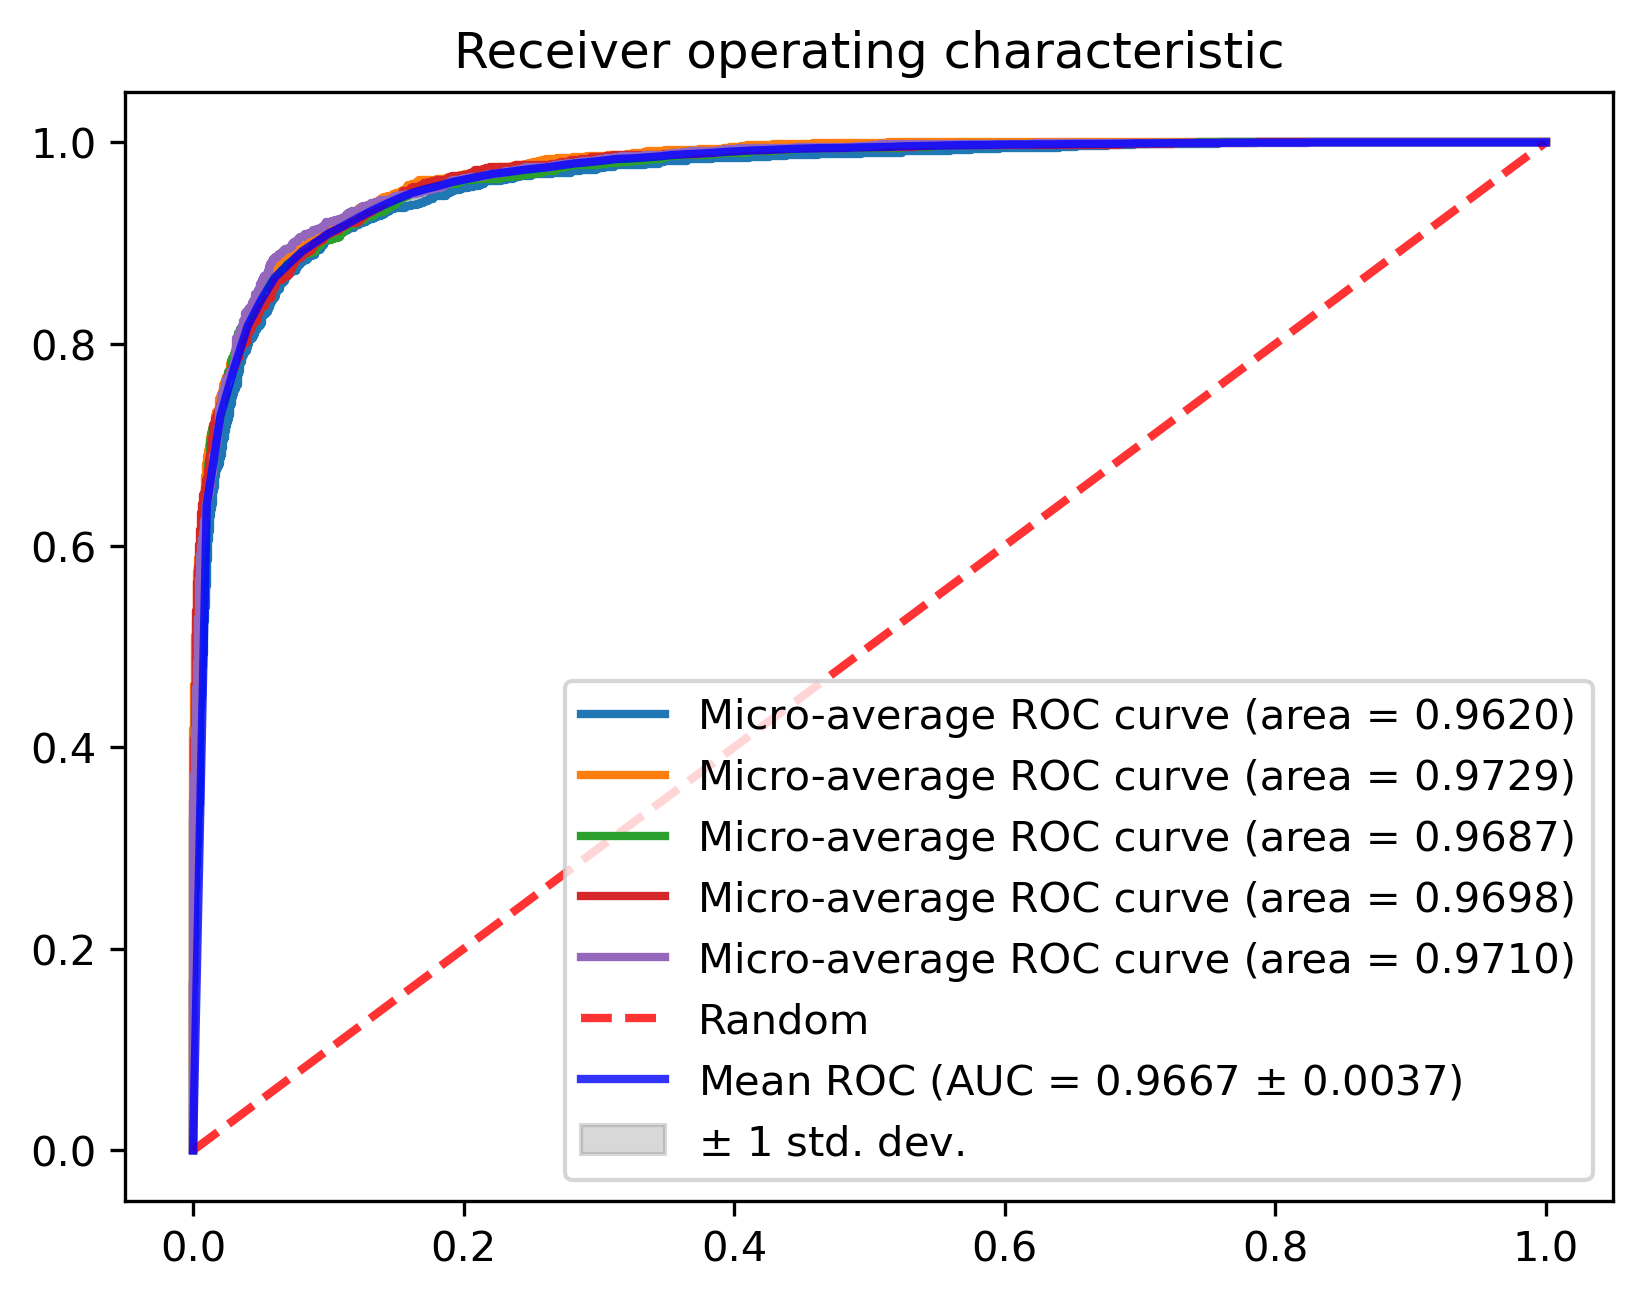

In [25]:
suffix = 'greet_embedding_peryton'
latent = np.load('./sign/latent_comparison/' + suffix + '.npy')
latent_m, latent_d = latent[:A.shape[0],:], latent[A.shape[0]:,:]
# cross validation
tprs = []
aucs = []
mean_fpr_ = np.linspace(0, 1, 100)
fig, ax = plt.subplots(dpi=300)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
iter_ = 0  # control each iterator
sum_score = 0
out = []
test_label_score = {}

for j, (train_index, test_index) in enumerate(kf.split(samples)):
    print('############ {} fold #############'.format(j))
    out.append([train_index, test_index])
    iter_ = iter_ + 1
    train_samples = samples[train_index, :]
    test_samples = samples[test_index, :]

    vec_len1 = latent_m.shape[1]
    vec_len2 = latent_d.shape[1]
    train_n = train_samples.shape[0]
    train_feature = np.zeros([train_n, vec_len1 + vec_len2])
    train_label = np.zeros([train_n])

    for i in range(train_n):
        train_feature[i, 0: vec_len1] = latent_m[train_samples[i, 0], :]
        train_feature[i, vec_len1: (vec_len1 + vec_len2)] = latent_d[train_samples[i, 1], :]

        train_label[i] = train_samples[i, 2]

    test_N = test_samples.shape[0]
    test_feature = np.zeros([test_N, vec_len1 + vec_len2])
    test_label = np.zeros(test_N)

    for i in range(test_N):
        test_feature[i, 0: vec_len1] = latent_m[test_samples[i, 0], :]
        test_feature[i, vec_len1: (vec_len1 + vec_len2)] = latent_d[test_samples[i, 1], :]

        test_label[i] = test_samples[i, 2]

    # from sklearn.neural_network import MLPClassifier
    model = xgboost.XGBClassifier(eval_metric=['logloss', 'auc', 'error'], use_label_encoder=True)
    # model = LogisticRegression(random_state=0, solver='sag', multi_class='ovr', verbose=1, max_iter=500)
    # model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
    # model = MLPClassifier(hidden_layer_sizes=(512, 64, 16), random_state=42)
    model.fit(train_feature, train_label)

    pre_test_proba = model.predict_proba(test_feature)

    y_test_binary = np.array([1 if i == k else 0 for i in test_label for k in [-1, 0, 1]]).reshape(-1, 3)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_binary[:, i], pre_test_proba[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    fpr["macro"] = all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
    temp_mean_tpr = np.zeros_like(all_fpr)
    # 通过trapezoidal规则计算Macro-average ROC曲线和AUC值
    for i in range(3):
        temp_mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    temp_mean_tpr /= 3
    tpr["macro"] = temp_mean_tpr
    roc_auc["macro"] = macro_auc = metrics.auc(all_fpr, temp_mean_tpr)

    # 计算Micro-average ROC曲线和AUC值
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test_binary.ravel(), pre_test_proba.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

    ax.plot(fpr["micro"], tpr["micro"], color=colors[j], lw=2,
            label='Micro-average ROC curve (area = {0:0.4f})'.format(roc_auc["micro"]))
    # ax.plot(fpr["macro"], tpr["macro"], color=colors[j], linestyle='--', lw=2,
    #         label='Macro-average ROC curve (fold{0}) (area = {1:0.4f})'.format(j, macro_auc))
    # for i in range(3):
    #     plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.4f) for class %d' % (roc_auc[i], i))

    interp_tpr = np.interp(mean_fpr_, fpr["micro"], tpr["micro"])
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc["micro"])

# np.save('./ablation/out/folds.npy', test_label_score)
# folds = test_label_score
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Random', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr_, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr_, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr_, tprs_lower, tprs_upper, color='grey', alpha=.3,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic")
ax.legend(loc="lower right")
# plt.show()
plt.savefig('./sign/fig/micro_'+suffix+'.tiff', dpi=300)

############ 0 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 1 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 2 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 3 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 4 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


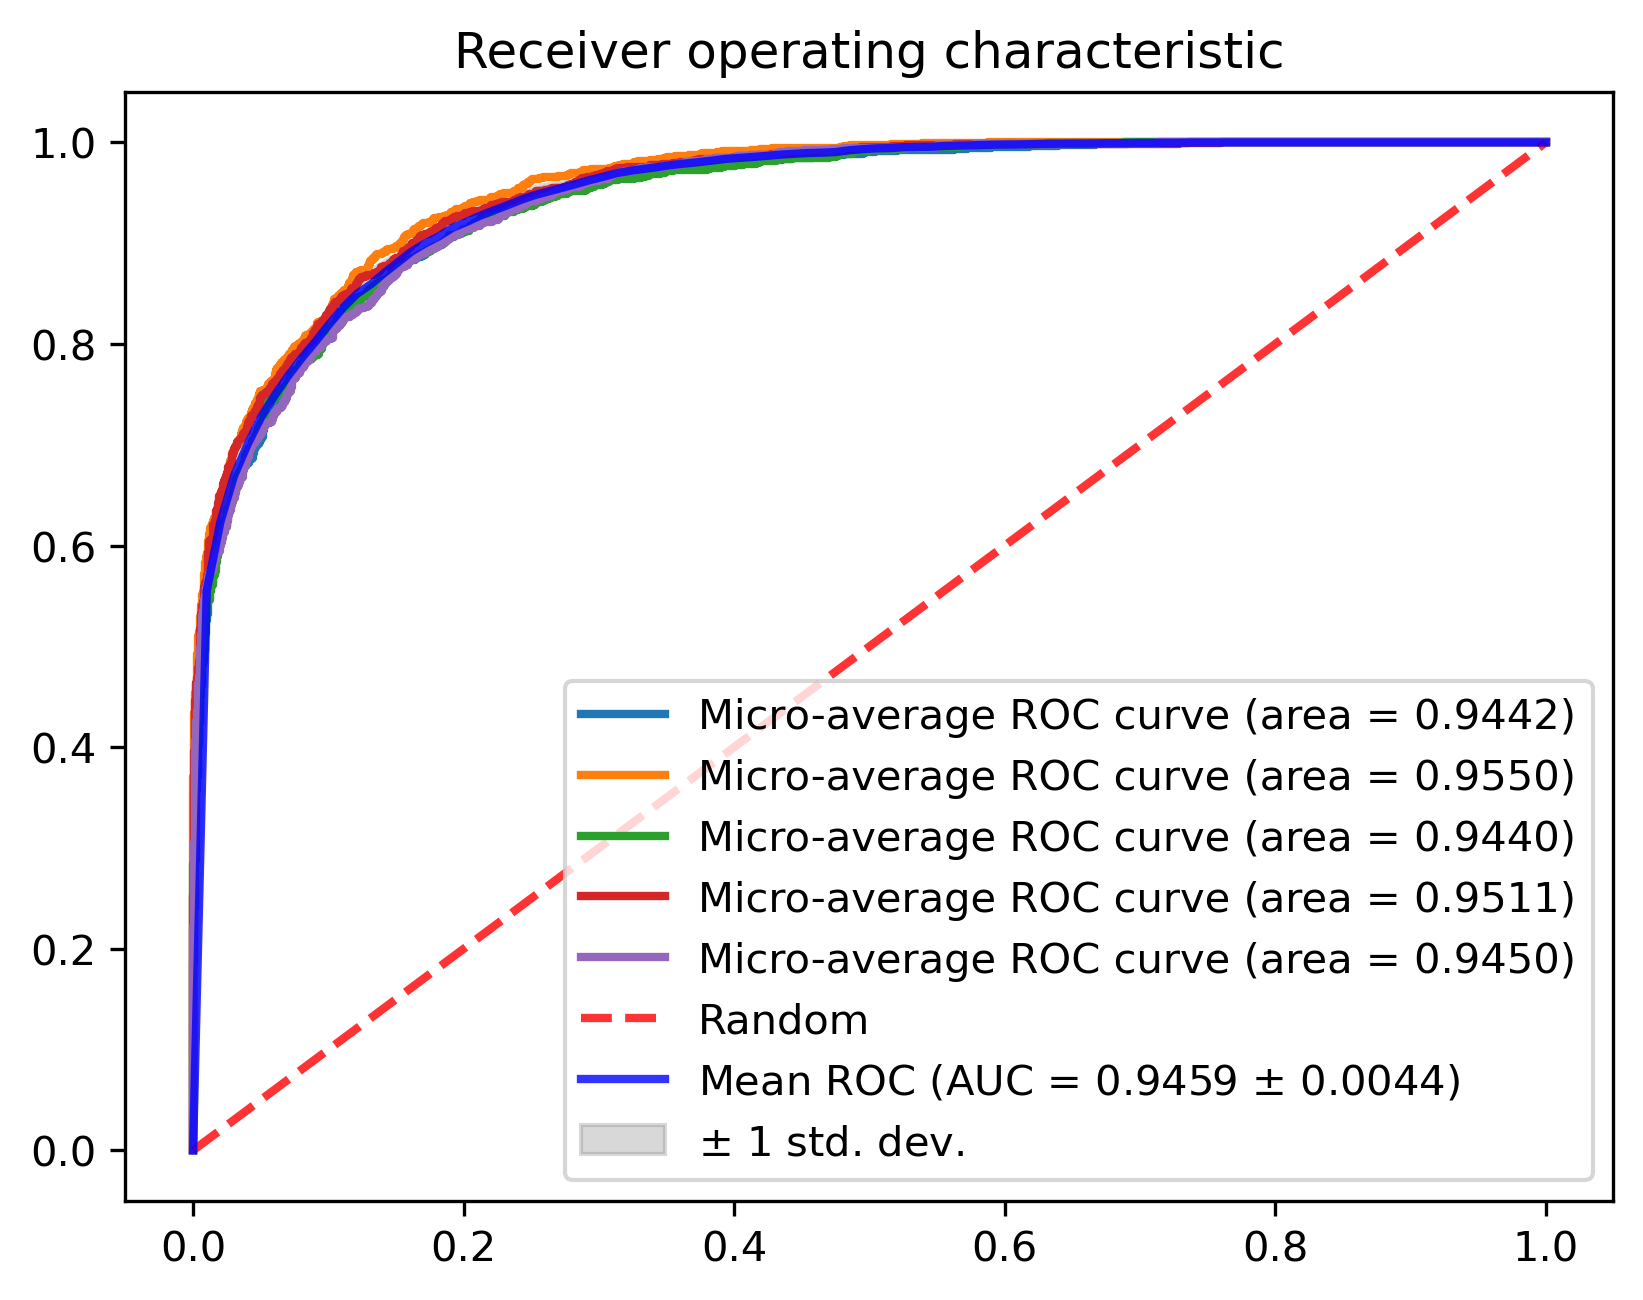

: 

In [6]:
suffix = 'peryton_sign2_dot_conv_leakyrelu_aux'
latent = np.load('./sign/latent/latent_' + suffix + '.npy')
latent_m, latent_d = latent[:A.shape[0],:], latent[A.shape[0]:,:]
# cross validation
tprs = []
aucs = []
mean_fpr_ = np.linspace(0, 1, 100)
fig, ax = plt.subplots(dpi=300)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
iter_ = 0  # control each iterator
sum_score = 0
out = []
test_label_score = {}

for j, (train_index, test_index) in enumerate(kf.split(samples)):
    print('############ {} fold #############'.format(j))
    out.append([train_index, test_index])
    iter_ = iter_ + 1
    train_samples = samples[train_index, :]
    test_samples = samples[test_index, :]

    vec_len1 = latent_m.shape[1]
    vec_len2 = latent_d.shape[1]
    train_n = train_samples.shape[0]
    train_feature = np.zeros([train_n, vec_len1 + vec_len2])
    train_label = np.zeros([train_n])

    for i in range(train_n):
        train_feature[i, 0: vec_len1] = latent_m[train_samples[i, 0], :]
        train_feature[i, vec_len1: (vec_len1 + vec_len2)] = latent_d[train_samples[i, 1], :]

        train_label[i] = train_samples[i, 2]

    test_N = test_samples.shape[0]
    test_feature = np.zeros([test_N, vec_len1 + vec_len2])
    test_label = np.zeros(test_N)

    for i in range(test_N):
        test_feature[i, 0: vec_len1] = latent_m[test_samples[i, 0], :]
        test_feature[i, vec_len1: (vec_len1 + vec_len2)] = latent_d[test_samples[i, 1], :]

        test_label[i] = test_samples[i, 2]

    # from sklearn.neural_network import MLPClassifier
    model = xgboost.XGBClassifier(eval_metric=['logloss', 'auc', 'error'], use_label_encoder=True)
    # model = LogisticRegression(random_state=0, solver='sag', multi_class='ovr', verbose=1, max_iter=500)
    # model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
    # model = MLPClassifier(hidden_layer_sizes=(512, 64, 16), random_state=42)
    model.fit(train_feature, train_label)

    pre_test_proba = model.predict_proba(test_feature)

    y_test_binary = np.array([1 if i == k else 0 for i in test_label for k in [-1, 0, 1]]).reshape(-1, 3)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_binary[:, i], pre_test_proba[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    fpr["macro"] = all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
    temp_mean_tpr = np.zeros_like(all_fpr)
    # 通过trapezoidal规则计算Macro-average ROC曲线和AUC值
    for i in range(3):
        temp_mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    temp_mean_tpr /= 3
    tpr["macro"] = temp_mean_tpr
    roc_auc["macro"] = macro_auc = metrics.auc(all_fpr, temp_mean_tpr)

    # 计算Micro-average ROC曲线和AUC值
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test_binary.ravel(), pre_test_proba.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

    ax.plot(fpr["micro"], tpr["micro"], color=colors[j], lw=2,
            label='Micro-average ROC curve (area = {0:0.4f})'.format(roc_auc["micro"]))
    # ax.plot(fpr["macro"], tpr["macro"], color=colors[j], linestyle='--', lw=2,
    #         label='Macro-average ROC curve (fold{0}) (area = {1:0.4f})'.format(j, macro_auc))
    # for i in range(3):
    #     plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.4f) for class %d' % (roc_auc[i], i))

    interp_tpr = np.interp(mean_fpr_, fpr["micro"], tpr["micro"])
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc["micro"])

# np.save('./ablation/out/folds.npy', test_label_score)
# folds = test_label_score
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Random', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr_, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr_, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr_, tprs_lower, tprs_upper, color='grey', alpha=.3,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic")
ax.legend(loc="lower right")
# plt.show()
plt.savefig('./sign/fig/micro_'+suffix+'.tiff', dpi=300)

############ 0 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 1 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 2 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 3 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 4 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


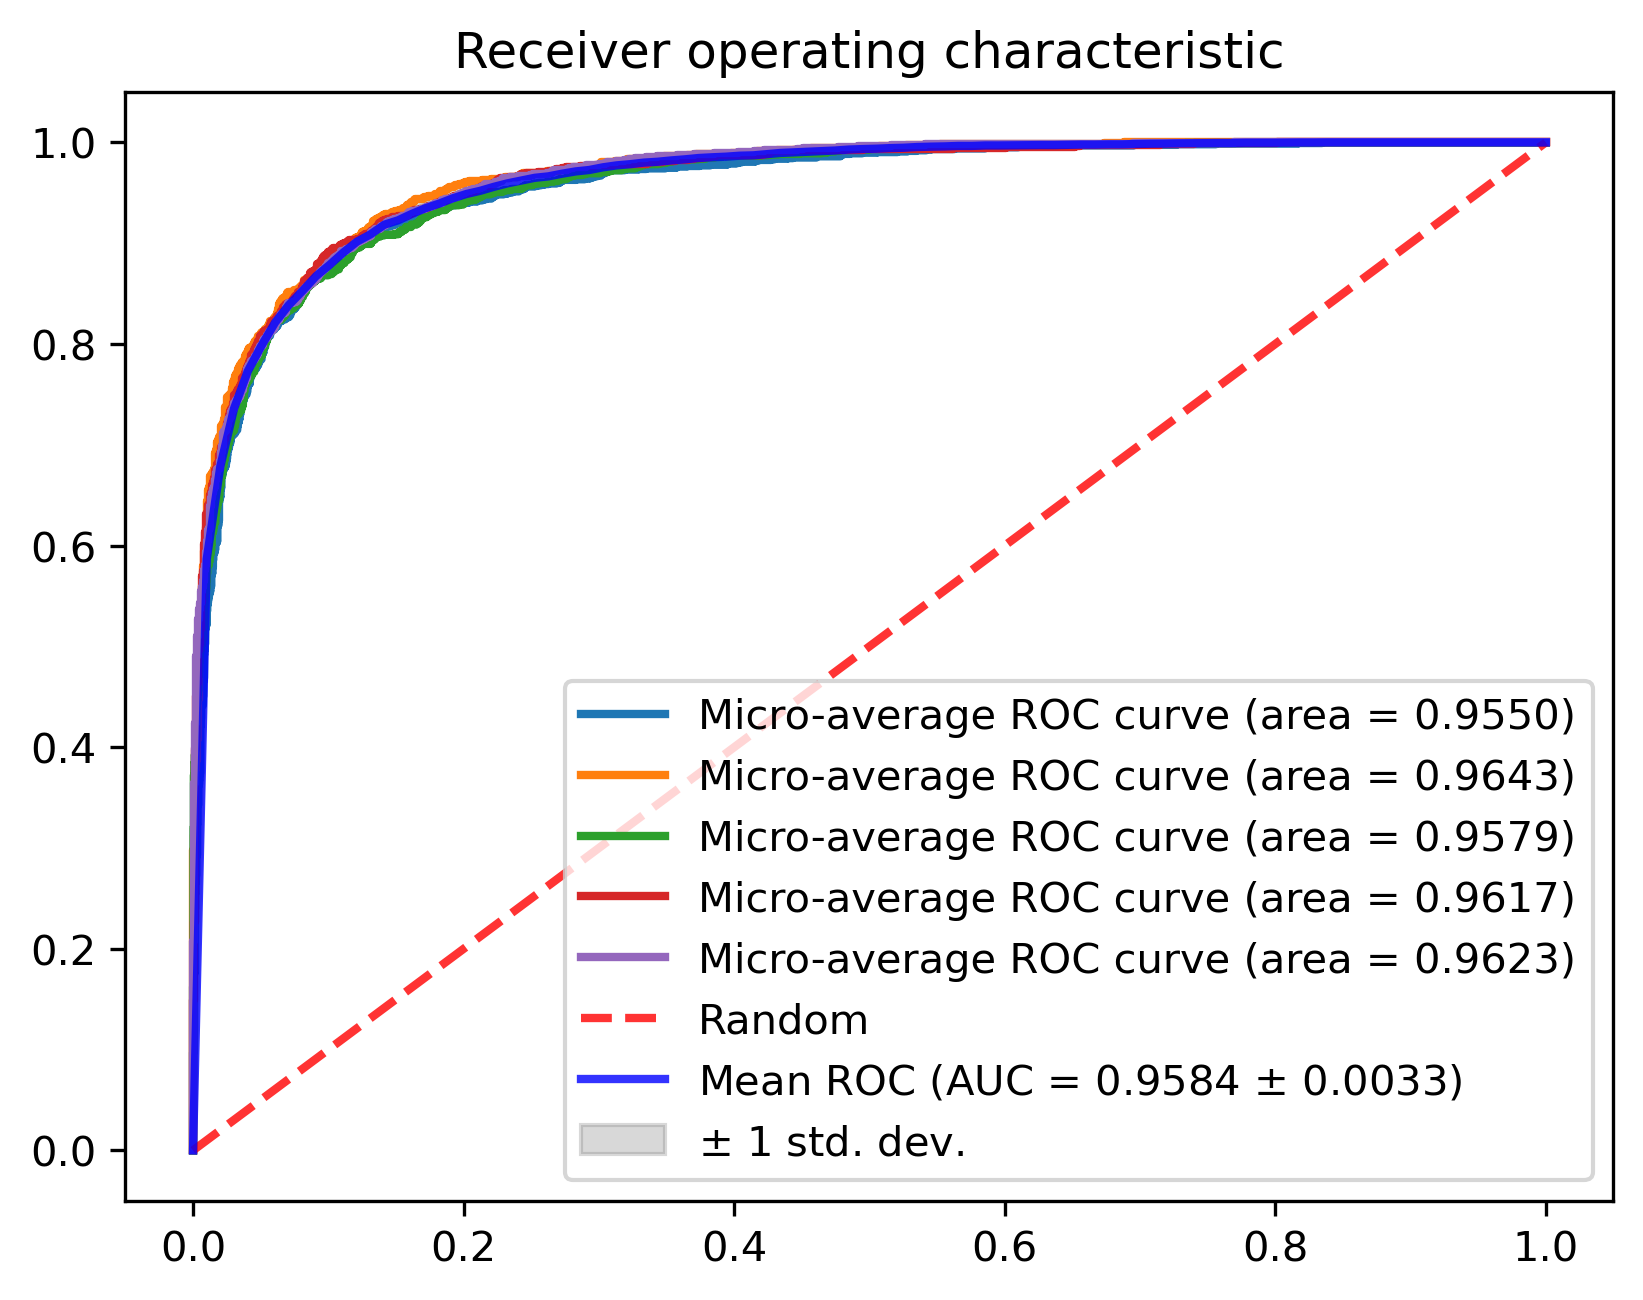

In [3]:
suffix = 'peryton_sign2_dot_conv_leakyrelu_w'
latent = np.load('./sign/latent/latent_' + suffix + '.npy')
latent_m, latent_d = latent[:A.shape[0],:], latent[A.shape[0]:,:]
# cross validation
tprs = []
aucs = []
mean_fpr_ = np.linspace(0, 1, 100)
fig, ax = plt.subplots(dpi=300)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
iter_ = 0  # control each iterator
sum_score = 0
out = []
test_label_score = {}

for j, (train_index, test_index) in enumerate(kf.split(samples)):
    print('############ {} fold #############'.format(j))
    out.append([train_index, test_index])
    iter_ = iter_ + 1
    train_samples = samples[train_index, :]
    test_samples = samples[test_index, :]

    vec_len1 = latent_m.shape[1]
    vec_len2 = latent_d.shape[1]
    train_n = train_samples.shape[0]
    train_feature = np.zeros([train_n, vec_len1 + vec_len2])
    train_label = np.zeros([train_n])

    for i in range(train_n):
        train_feature[i, 0: vec_len1] = latent_m[train_samples[i, 0], :]
        train_feature[i, vec_len1: (vec_len1 + vec_len2)] = latent_d[train_samples[i, 1], :]

        train_label[i] = train_samples[i, 2]

    test_N = test_samples.shape[0]
    test_feature = np.zeros([test_N, vec_len1 + vec_len2])
    test_label = np.zeros(test_N)

    for i in range(test_N):
        test_feature[i, 0: vec_len1] = latent_m[test_samples[i, 0], :]
        test_feature[i, vec_len1: (vec_len1 + vec_len2)] = latent_d[test_samples[i, 1], :]

        test_label[i] = test_samples[i, 2]

    # from sklearn.neural_network import MLPClassifier
    model = xgboost.XGBClassifier(eval_metric=['logloss', 'auc', 'error'], use_label_encoder=True)
    # model = LogisticRegression(random_state=0, solver='sag', multi_class='ovr', verbose=1, max_iter=500)
    # model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
    # model = MLPClassifier(hidden_layer_sizes=(512, 64, 16), random_state=42)
    model.fit(train_feature, train_label)

    pre_test_proba = model.predict_proba(test_feature)

    y_test_binary = np.array([1 if i == k else 0 for i in test_label for k in [-1, 0, 1]]).reshape(-1, 3)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_binary[:, i], pre_test_proba[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    fpr["macro"] = all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
    temp_mean_tpr = np.zeros_like(all_fpr)
    # 通过trapezoidal规则计算Macro-average ROC曲线和AUC值
    for i in range(3):
        temp_mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    temp_mean_tpr /= 3
    tpr["macro"] = temp_mean_tpr
    roc_auc["macro"] = macro_auc = metrics.auc(all_fpr, temp_mean_tpr)

    # 计算Micro-average ROC曲线和AUC值
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test_binary.ravel(), pre_test_proba.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

    ax.plot(fpr["micro"], tpr["micro"], color=colors[j], lw=2,
            label='Micro-average ROC curve (area = {0:0.4f})'.format(roc_auc["micro"]))
    # ax.plot(fpr["macro"], tpr["macro"], color=colors[j], linestyle='--', lw=2,
    #         label='Macro-average ROC curve (fold{0}) (area = {1:0.4f})'.format(j, macro_auc))
    # for i in range(3):
    #     plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.4f) for class %d' % (roc_auc[i], i))

    interp_tpr = np.interp(mean_fpr_, fpr["micro"], tpr["micro"])
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc["micro"])

# np.save('./ablation/out/folds.npy', test_label_score)
# folds = test_label_score
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Random', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr_, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr_, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr_, tprs_lower, tprs_upper, color='grey', alpha=.3,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic")
ax.legend(loc="lower right")
# plt.show()
plt.savefig('./sign/fig/micro_'+suffix+'.tiff', dpi=300)

############ 0 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 1 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 2 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 3 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 4 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


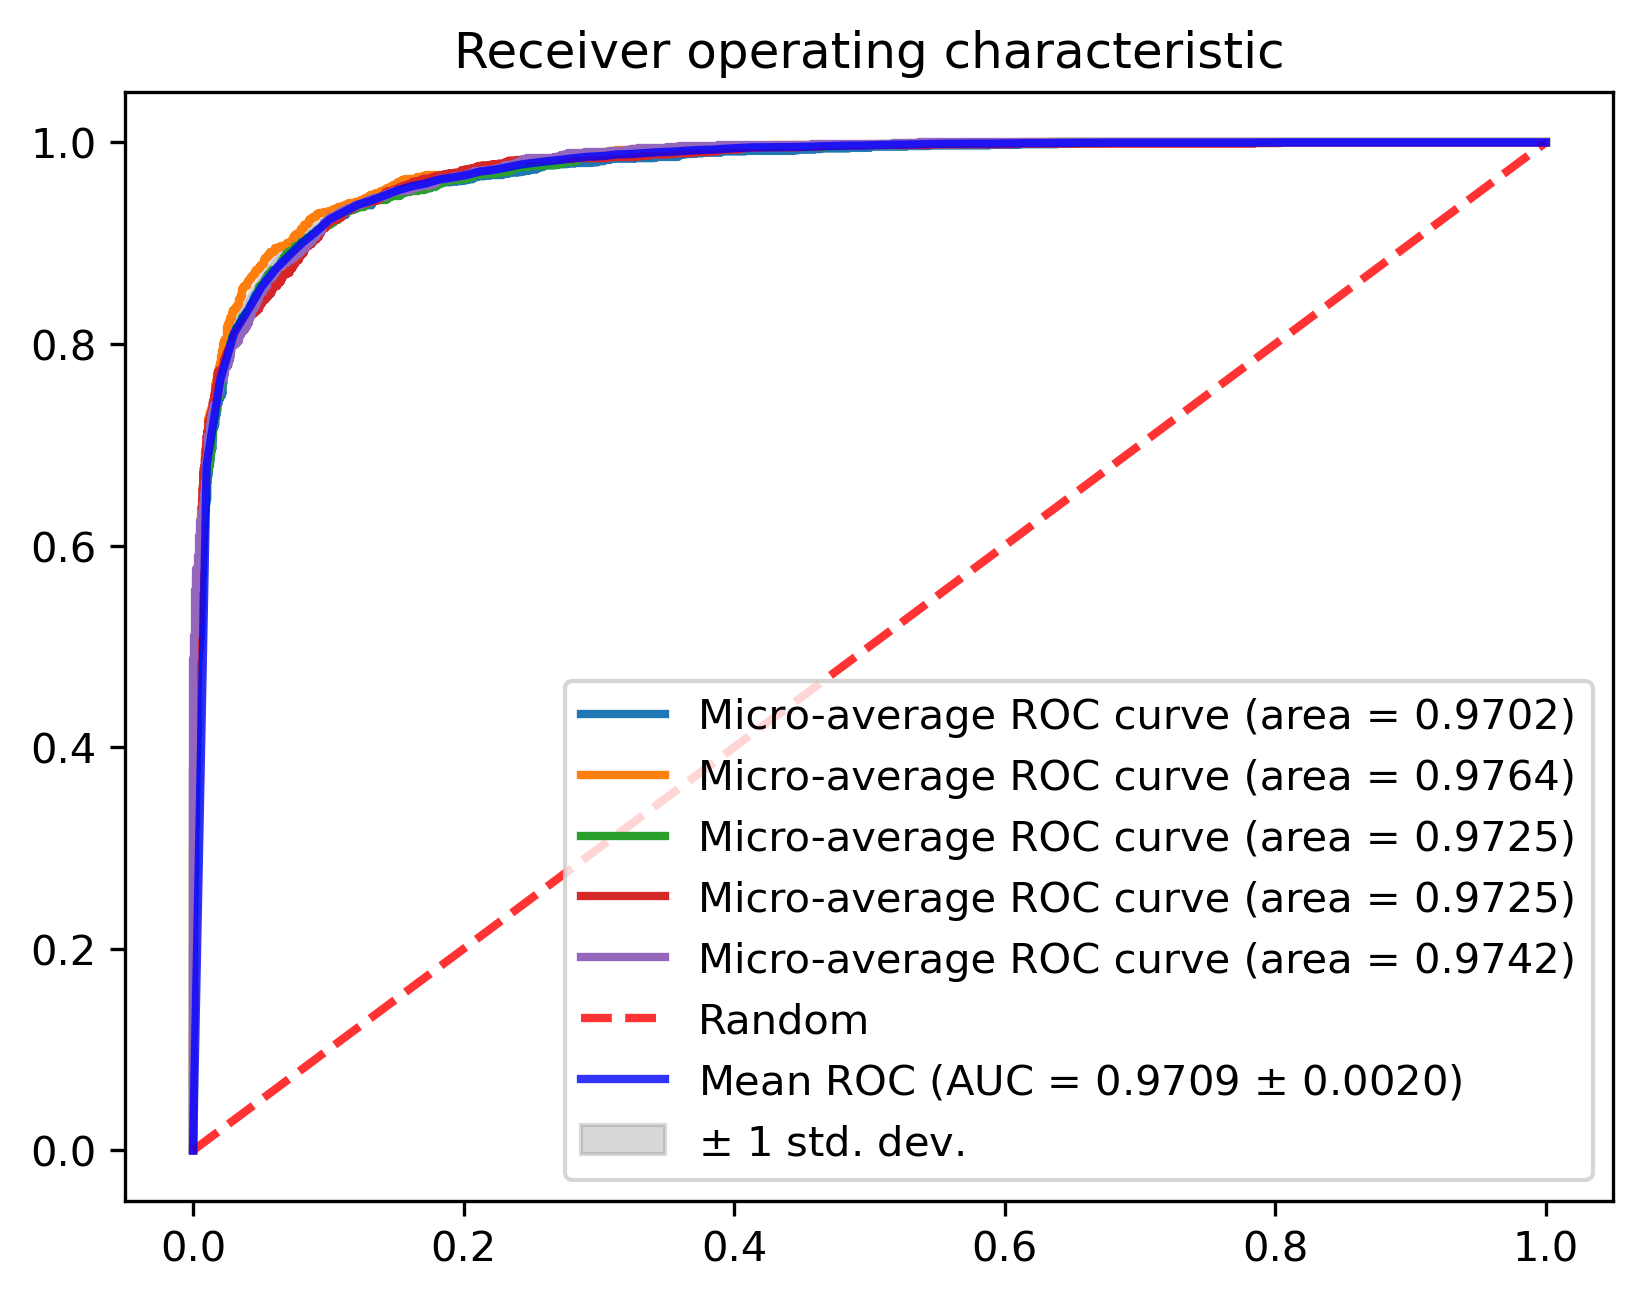

In [4]:
suffix = 'peryton_sign2_dot_conv_leakyrelu_base_noeye'
latent = np.load('./sign/latent/latent_' + suffix + '.npy')
latent_m, latent_d = latent[:A.shape[0],:], latent[A.shape[0]:,:]
# cross validation
tprs = []
aucs = []
mean_fpr_ = np.linspace(0, 1, 100)
fig, ax = plt.subplots(dpi=300)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
iter_ = 0  # control each iterator
sum_score = 0
out = []
test_label_score = {}

for j, (train_index, test_index) in enumerate(kf.split(samples)):
    print('############ {} fold #############'.format(j))
    out.append([train_index, test_index])
    iter_ = iter_ + 1
    train_samples = samples[train_index, :]
    test_samples = samples[test_index, :]

    vec_len1 = latent_m.shape[1]
    vec_len2 = latent_d.shape[1]
    train_n = train_samples.shape[0]
    train_feature = np.zeros([train_n, vec_len1 + vec_len2])
    train_label = np.zeros([train_n])

    for i in range(train_n):
        train_feature[i, 0: vec_len1] = latent_m[train_samples[i, 0], :]
        train_feature[i, vec_len1: (vec_len1 + vec_len2)] = latent_d[train_samples[i, 1], :]

        train_label[i] = train_samples[i, 2]

    test_N = test_samples.shape[0]
    test_feature = np.zeros([test_N, vec_len1 + vec_len2])
    test_label = np.zeros(test_N)

    for i in range(test_N):
        test_feature[i, 0: vec_len1] = latent_m[test_samples[i, 0], :]
        test_feature[i, vec_len1: (vec_len1 + vec_len2)] = latent_d[test_samples[i, 1], :]

        test_label[i] = test_samples[i, 2]

    # from sklearn.neural_network import MLPClassifier
    model = xgboost.XGBClassifier(eval_metric=['logloss', 'auc', 'error'], use_label_encoder=True)
    # model = LogisticRegression(random_state=0, solver='sag', multi_class='ovr', verbose=1, max_iter=500)
    # model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
    # model = MLPClassifier(hidden_layer_sizes=(512, 64, 16), random_state=42)
    model.fit(train_feature, train_label)

    pre_test_proba = model.predict_proba(test_feature)

    y_test_binary = np.array([1 if i == k else 0 for i in test_label for k in [-1, 0, 1]]).reshape(-1, 3)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_binary[:, i], pre_test_proba[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    fpr["macro"] = all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
    temp_mean_tpr = np.zeros_like(all_fpr)
    # 通过trapezoidal规则计算Macro-average ROC曲线和AUC值
    for i in range(3):
        temp_mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    temp_mean_tpr /= 3
    tpr["macro"] = temp_mean_tpr
    roc_auc["macro"] = macro_auc = metrics.auc(all_fpr, temp_mean_tpr)

    # 计算Micro-average ROC曲线和AUC值
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test_binary.ravel(), pre_test_proba.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

    ax.plot(fpr["micro"], tpr["micro"], color=colors[j], lw=2,
            label='Micro-average ROC curve (area = {0:0.4f})'.format(roc_auc["micro"]))
    # ax.plot(fpr["macro"], tpr["macro"], color=colors[j], linestyle='--', lw=2,
    #         label='Macro-average ROC curve (fold{0}) (area = {1:0.4f})'.format(j, macro_auc))
    # for i in range(3):
    #     plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.4f) for class %d' % (roc_auc[i], i))

    interp_tpr = np.interp(mean_fpr_, fpr["micro"], tpr["micro"])
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc["micro"])

# np.save('./ablation/out/folds.npy', test_label_score)
# folds = test_label_score
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Random', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr_, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr_, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr_, tprs_lower, tprs_upper, color='grey', alpha=.3,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic")
ax.legend(loc="lower right")
# plt.show()
plt.savefig('./sign/fig/micro_'+suffix+'.tiff', dpi=300)

############ 0 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 1 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 2 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 3 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 4 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


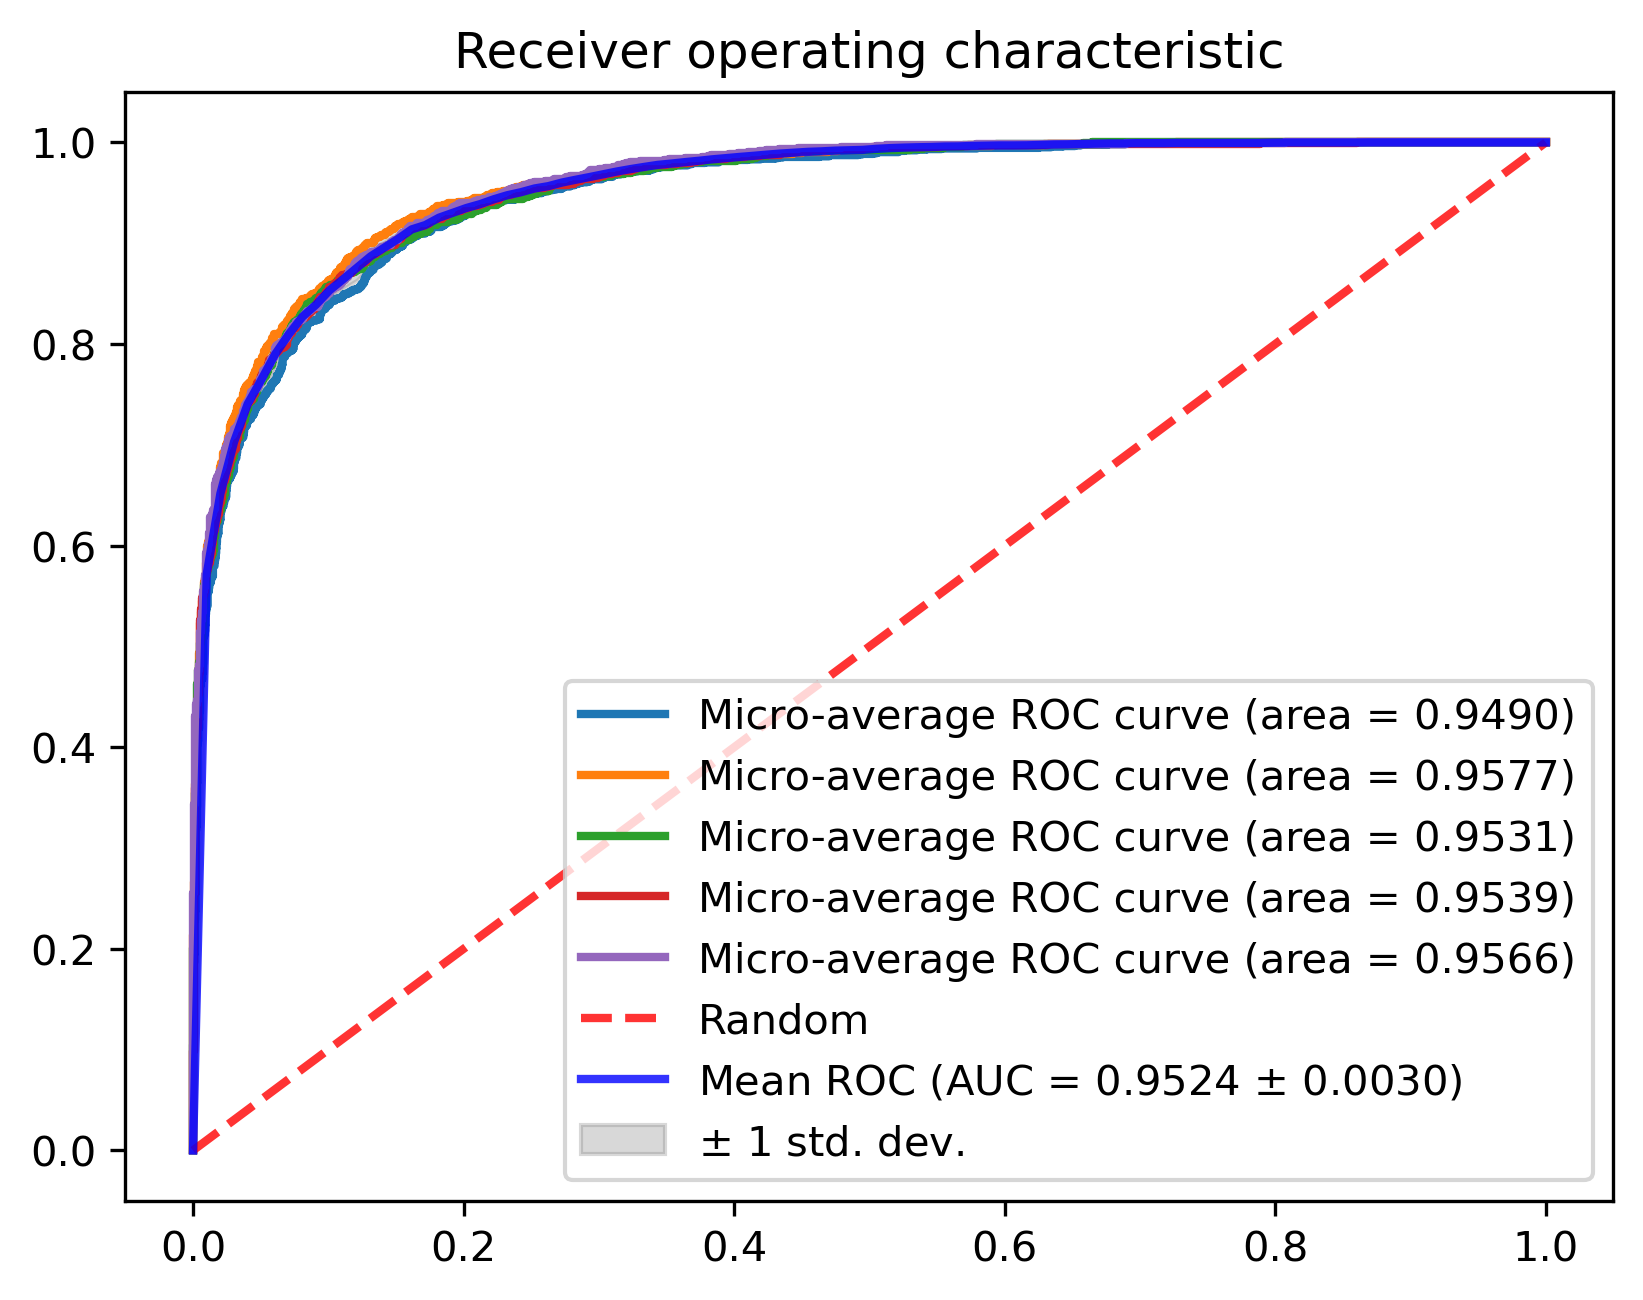

In [10]:
suffix = 'peryton_sign2_dot_conv_leakyrelu_w_noeye'
latent = np.load('./sign/latent/latent_' + suffix + '.npy')
latent_m, latent_d = latent[:A.shape[0],:], latent[A.shape[0]:,:]
# cross validation
tprs = []
aucs = []
mean_fpr_ = np.linspace(0, 1, 100)
fig, ax = plt.subplots(dpi=300)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
iter_ = 0  # control each iterator
sum_score = 0
out = []
test_label_score = {}

for j, (train_index, test_index) in enumerate(kf.split(samples)):
    print('############ {} fold #############'.format(j))
    out.append([train_index, test_index])
    iter_ = iter_ + 1
    train_samples = samples[train_index, :]
    test_samples = samples[test_index, :]

    vec_len1 = latent_m.shape[1]
    vec_len2 = latent_d.shape[1]
    train_n = train_samples.shape[0]
    train_feature = np.zeros([train_n, vec_len1 + vec_len2])
    train_label = np.zeros([train_n])

    for i in range(train_n):
        train_feature[i, 0: vec_len1] = latent_m[train_samples[i, 0], :]
        train_feature[i, vec_len1: (vec_len1 + vec_len2)] = latent_d[train_samples[i, 1], :]

        train_label[i] = train_samples[i, 2]

    test_N = test_samples.shape[0]
    test_feature = np.zeros([test_N, vec_len1 + vec_len2])
    test_label = np.zeros(test_N)

    for i in range(test_N):
        test_feature[i, 0: vec_len1] = latent_m[test_samples[i, 0], :]
        test_feature[i, vec_len1: (vec_len1 + vec_len2)] = latent_d[test_samples[i, 1], :]

        test_label[i] = test_samples[i, 2]

    # from sklearn.neural_network import MLPClassifier
    model = xgboost.XGBClassifier(eval_metric=['logloss', 'auc', 'error'], use_label_encoder=True)
    # model = LogisticRegression(random_state=0, solver='sag', multi_class='ovr', verbose=1, max_iter=500)
    # model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
    # model = MLPClassifier(hidden_layer_sizes=(512, 64, 16), random_state=42)
    model.fit(train_feature, train_label)

    pre_test_proba = model.predict_proba(test_feature)

    y_test_binary = np.array([1 if i == k else 0 for i in test_label for k in [-1, 0, 1]]).reshape(-1, 3)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_binary[:, i], pre_test_proba[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    fpr["macro"] = all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
    temp_mean_tpr = np.zeros_like(all_fpr)
    # 通过trapezoidal规则计算Macro-average ROC曲线和AUC值
    for i in range(3):
        temp_mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    temp_mean_tpr /= 3
    tpr["macro"] = temp_mean_tpr
    roc_auc["macro"] = macro_auc = metrics.auc(all_fpr, temp_mean_tpr)

    # 计算Micro-average ROC曲线和AUC值
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test_binary.ravel(), pre_test_proba.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

    ax.plot(fpr["micro"], tpr["micro"], color=colors[j], lw=2,
            label='Micro-average ROC curve (area = {0:0.4f})'.format(roc_auc["micro"]))
    # ax.plot(fpr["macro"], tpr["macro"], color=colors[j], linestyle='--', lw=2,
    #         label='Macro-average ROC curve (fold{0}) (area = {1:0.4f})'.format(j, macro_auc))
    # for i in range(3):
    #     plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.4f) for class %d' % (roc_auc[i], i))

    interp_tpr = np.interp(mean_fpr_, fpr["micro"], tpr["micro"])
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc["micro"])

# np.save('./ablation/out/folds.npy', test_label_score)
# folds = test_label_score
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Random', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr_, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr_, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr_, tprs_lower, tprs_upper, color='grey', alpha=.3,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic")
ax.legend(loc="lower right")
# plt.show()
plt.savefig('./sign/fig/micro_'+suffix+'.tiff', dpi=300)

############ 0 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 1 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 2 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 3 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 4 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 5 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 6 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 7 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 8 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 9 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


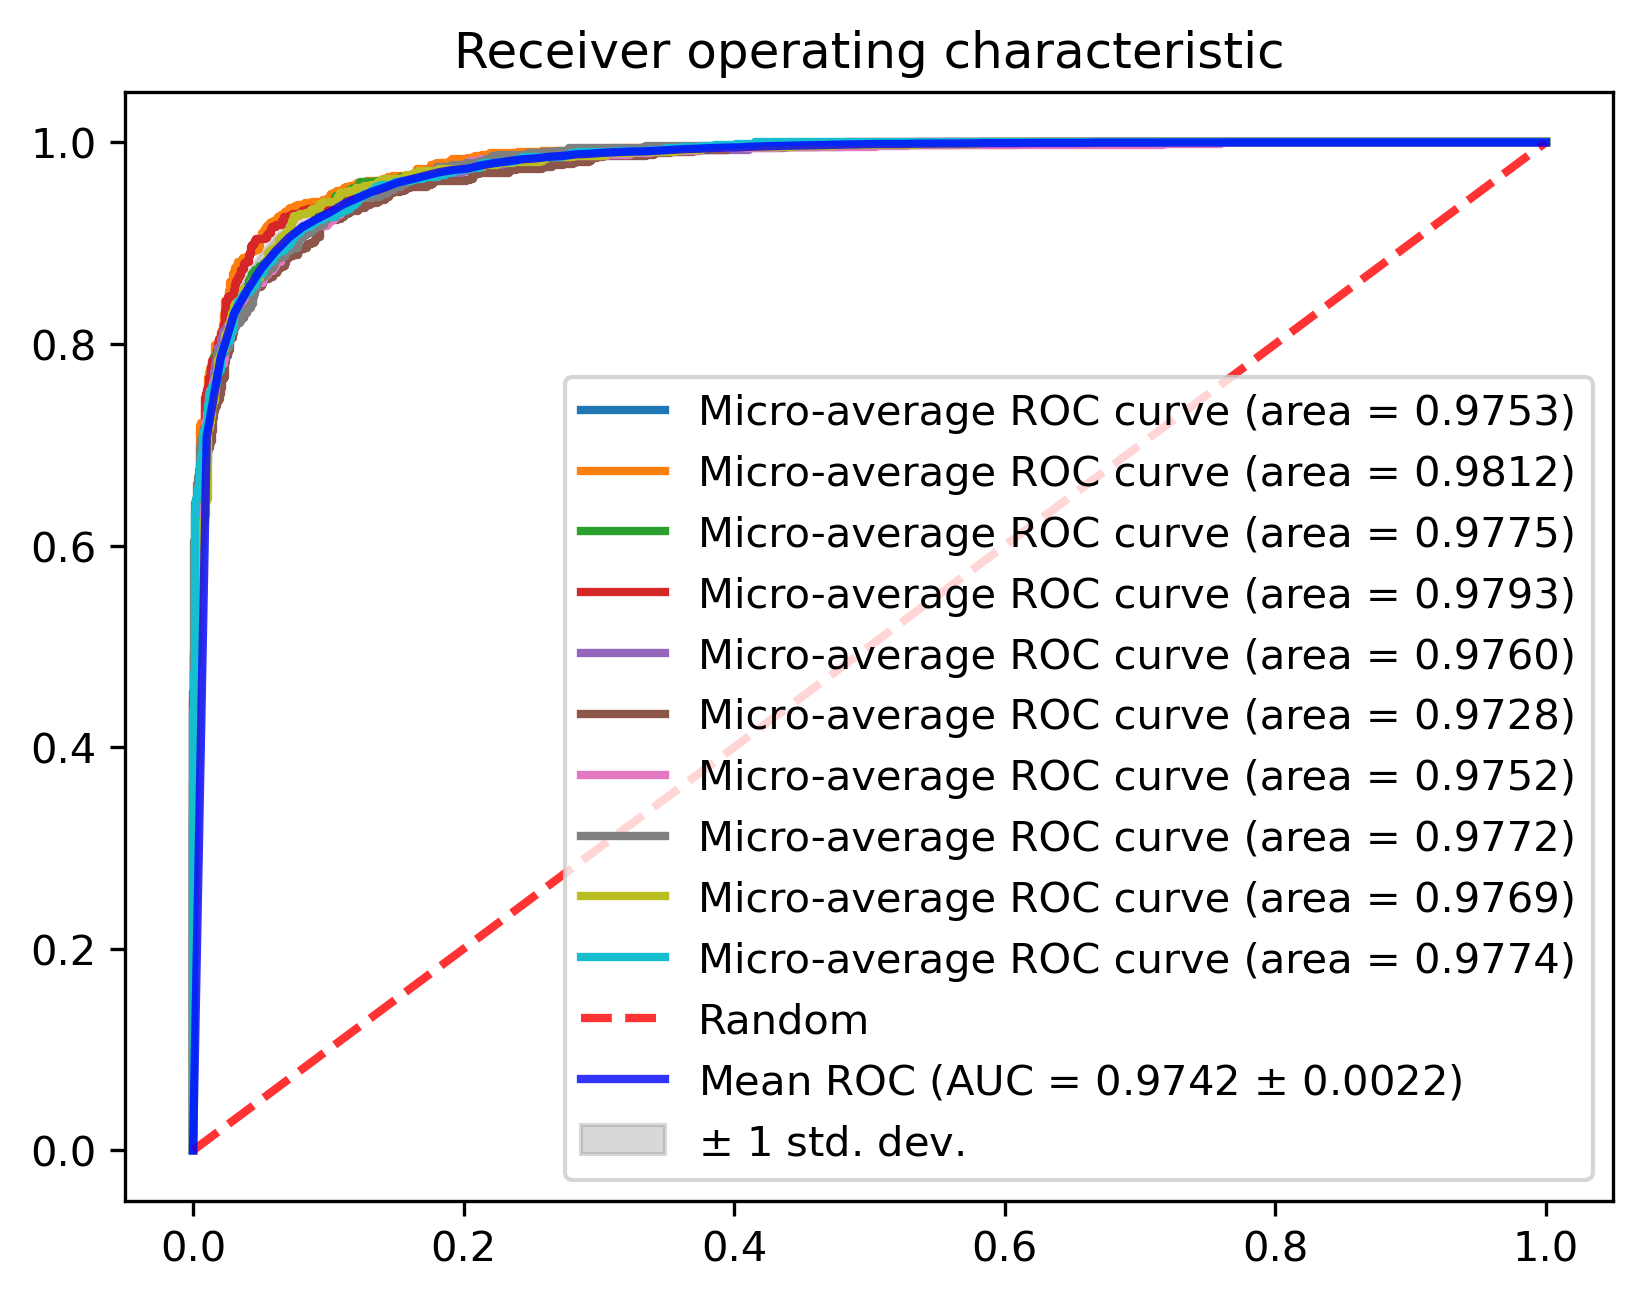

: 

In [4]:
suffix = 'peryton_sign2_dot_conv_leakyrelu_base_noeye'
latent = np.load('./sign/latent1/latent_' + suffix + '.npy')
latent_m, latent_d = latent[:A.shape[0],:], latent[A.shape[0]:,:]
# cross validation
tprs = []
aucs = []
mean_fpr_ = np.linspace(0, 1, 100)
fig, ax = plt.subplots(dpi=300)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
iter_ = 0  # control each iterator
sum_score = 0
out = []
test_label_score = {}

for j, (train_index, test_index) in enumerate(kf.split(samples)):
    print('############ {} fold #############'.format(j))
    out.append([train_index, test_index])
    iter_ = iter_ + 1
    train_samples = samples[train_index, :]
    test_samples = samples[test_index, :]

    vec_len1 = latent_m.shape[1]
    vec_len2 = latent_d.shape[1]
    train_n = train_samples.shape[0]
    train_feature = np.zeros([train_n, vec_len1 + vec_len2])
    train_label = np.zeros([train_n])

    for i in range(train_n):
        train_feature[i, 0: vec_len1] = latent_m[train_samples[i, 0], :]
        train_feature[i, vec_len1: (vec_len1 + vec_len2)] = latent_d[train_samples[i, 1], :]

        train_label[i] = train_samples[i, 2]

    test_N = test_samples.shape[0]
    test_feature = np.zeros([test_N, vec_len1 + vec_len2])
    test_label = np.zeros(test_N)

    for i in range(test_N):
        test_feature[i, 0: vec_len1] = latent_m[test_samples[i, 0], :]
        test_feature[i, vec_len1: (vec_len1 + vec_len2)] = latent_d[test_samples[i, 1], :]

        test_label[i] = test_samples[i, 2]

    # from sklearn.neural_network import MLPClassifier
    model = xgboost.XGBClassifier(eval_metric=['logloss', 'auc', 'error'], use_label_encoder=True)
    # model = LogisticRegression(random_state=0, solver='sag', multi_class='ovr', verbose=1, max_iter=500)
    # model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
    # model = MLPClassifier(hidden_layer_sizes=(512, 64, 16), random_state=42)
    model.fit(train_feature, train_label)

    pre_test_proba = model.predict_proba(test_feature)

    y_test_binary = np.array([1 if i == k else 0 for i in test_label for k in [-1, 0, 1]]).reshape(-1, 3)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_binary[:, i], pre_test_proba[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    fpr["macro"] = all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
    temp_mean_tpr = np.zeros_like(all_fpr)
    # 通过trapezoidal规则计算Macro-average ROC曲线和AUC值
    for i in range(3):
        temp_mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    temp_mean_tpr /= 3
    tpr["macro"] = temp_mean_tpr
    roc_auc["macro"] = macro_auc = metrics.auc(all_fpr, temp_mean_tpr)

    # 计算Micro-average ROC曲线和AUC值
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test_binary.ravel(), pre_test_proba.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

    ax.plot(fpr["micro"], tpr["micro"], color=colors[j], lw=2,
            label='Micro-average ROC curve (area = {0:0.4f})'.format(roc_auc["micro"]))
    # ax.plot(fpr["macro"], tpr["macro"], color=colors[j], linestyle='--', lw=2,
    #         label='Macro-average ROC curve (fold{0}) (area = {1:0.4f})'.format(j, macro_auc))
    # for i in range(3):
    #     plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.4f) for class %d' % (roc_auc[i], i))

    interp_tpr = np.interp(mean_fpr_, fpr["micro"], tpr["micro"])
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc["micro"])

    test_label_score['fold '+str(j)] = [y_test_binary, pre_test_proba]

np.save('./sign/latent_database/peryton_sign2_folds.npy', test_label_score)
# folds = test_label_score
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Random', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr_, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr_, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr_, tprs_lower, tprs_upper, color='grey', alpha=.3,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic")
ax.legend(loc="lower right")
# plt.show()
# plt.savefig('./sign/fig1/micro_10fold_'+suffix+'.tiff', dpi=300)

############ 0 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 1 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 2 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 3 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 4 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 5 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 6 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 7 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 8 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 9 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


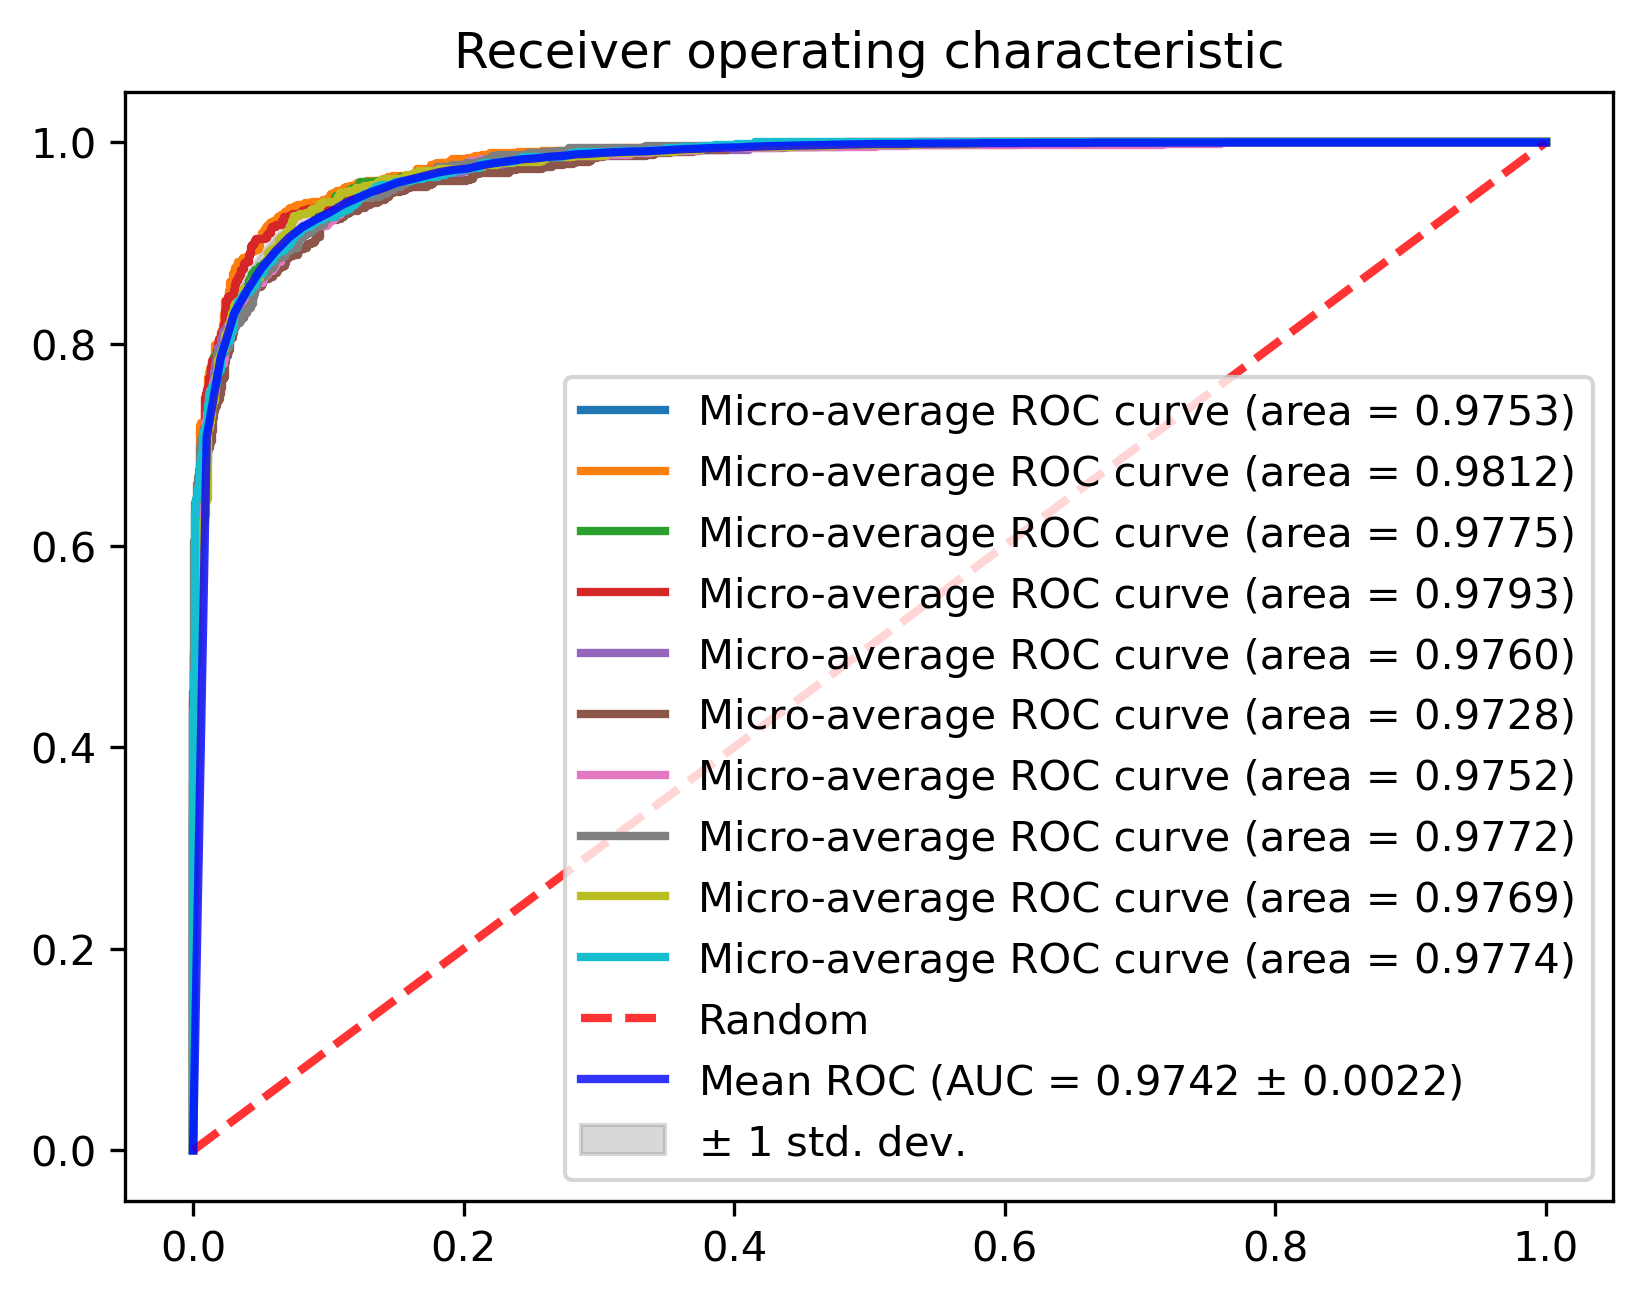

In [3]:
suffix = 'peryton_sign2_dot_conv_leakyrelu_base_noeye'
latent = np.load('./sign/latent1/latent_' + suffix + '.npy')
latent_m, latent_d = latent[:A.shape[0],:], latent[A.shape[0]:,:]
# cross validation
tprs = []
aucs = []
mean_fpr_ = np.linspace(0, 1, 100)
fig, ax = plt.subplots(dpi=300)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
iter_ = 0  # control each iterator
sum_score = 0
out = []
test_label_score = {}

for j, (train_index, test_index) in enumerate(kf.split(samples)):
    print('############ {} fold #############'.format(j))
    out.append([train_index, test_index])
    iter_ = iter_ + 1
    train_samples = samples[train_index, :]
    test_samples = samples[test_index, :]

    vec_len1 = latent_m.shape[1]
    vec_len2 = latent_d.shape[1]
    train_n = train_samples.shape[0]
    train_feature = np.zeros([train_n, vec_len1 + vec_len2])
    train_label = np.zeros([train_n])

    for i in range(train_n):
        train_feature[i, 0: vec_len1] = latent_m[train_samples[i, 0], :]
        train_feature[i, vec_len1: (vec_len1 + vec_len2)] = latent_d[train_samples[i, 1], :]

        train_label[i] = train_samples[i, 2]

    test_N = test_samples.shape[0]
    test_feature = np.zeros([test_N, vec_len1 + vec_len2])
    test_label = np.zeros(test_N)

    for i in range(test_N):
        test_feature[i, 0: vec_len1] = latent_m[test_samples[i, 0], :]
        test_feature[i, vec_len1: (vec_len1 + vec_len2)] = latent_d[test_samples[i, 1], :]

        test_label[i] = test_samples[i, 2]

    # from sklearn.neural_network import MLPClassifier
    model = xgboost.XGBClassifier(eval_metric=['logloss', 'auc', 'error'], use_label_encoder=True)
    # model = LogisticRegression(random_state=0, solver='sag', multi_class='ovr', verbose=1, max_iter=500)
    # model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
    # model = MLPClassifier(hidden_layer_sizes=(512, 64, 16), random_state=42)
    model.fit(train_feature, train_label)

    pre_test_proba = model.predict_proba(test_feature)

    y_test_binary = np.array([1 if i == k else 0 for i in test_label for k in [-1, 0, 1]]).reshape(-1, 3)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_binary[:, i], pre_test_proba[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    fpr["macro"] = all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
    temp_mean_tpr = np.zeros_like(all_fpr)
    # 通过trapezoidal规则计算Macro-average ROC曲线和AUC值
    for i in range(3):
        temp_mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    temp_mean_tpr /= 3
    tpr["macro"] = temp_mean_tpr
    roc_auc["macro"] = macro_auc = metrics.auc(all_fpr, temp_mean_tpr)

    # 计算Micro-average ROC曲线和AUC值
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test_binary.ravel(), pre_test_proba.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

    ax.plot(fpr["micro"], tpr["micro"], color=colors[j], lw=2,
            label='Micro-average ROC curve (area = {0:0.4f})'.format(roc_auc["micro"]))
    # ax.plot(fpr["macro"], tpr["macro"], color=colors[j], linestyle='--', lw=2,
    #         label='Macro-average ROC curve (fold{0}) (area = {1:0.4f})'.format(j, macro_auc))
    # for i in range(3):
    #     plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.4f) for class %d' % (roc_auc[i], i))

    interp_tpr = np.interp(mean_fpr_, fpr["micro"], tpr["micro"])
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc["micro"])

    test_label_score['fold '+str(j)] = [y_test_binary, pre_test_proba]

# np.save('./ablation/out/folds.npy', test_label_score)
folds = test_label_score
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Random', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr_, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr_, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr_, tprs_lower, tprs_upper, color='grey', alpha=.3,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic")
ax.legend(loc="lower right")
# plt.show()
# plt.savefig('./sign/fig1/micro_'+suffix+'.tiff', dpi=300)

############ 0 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 1 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 2 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 3 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 4 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 5 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 6 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 7 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 8 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 9 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


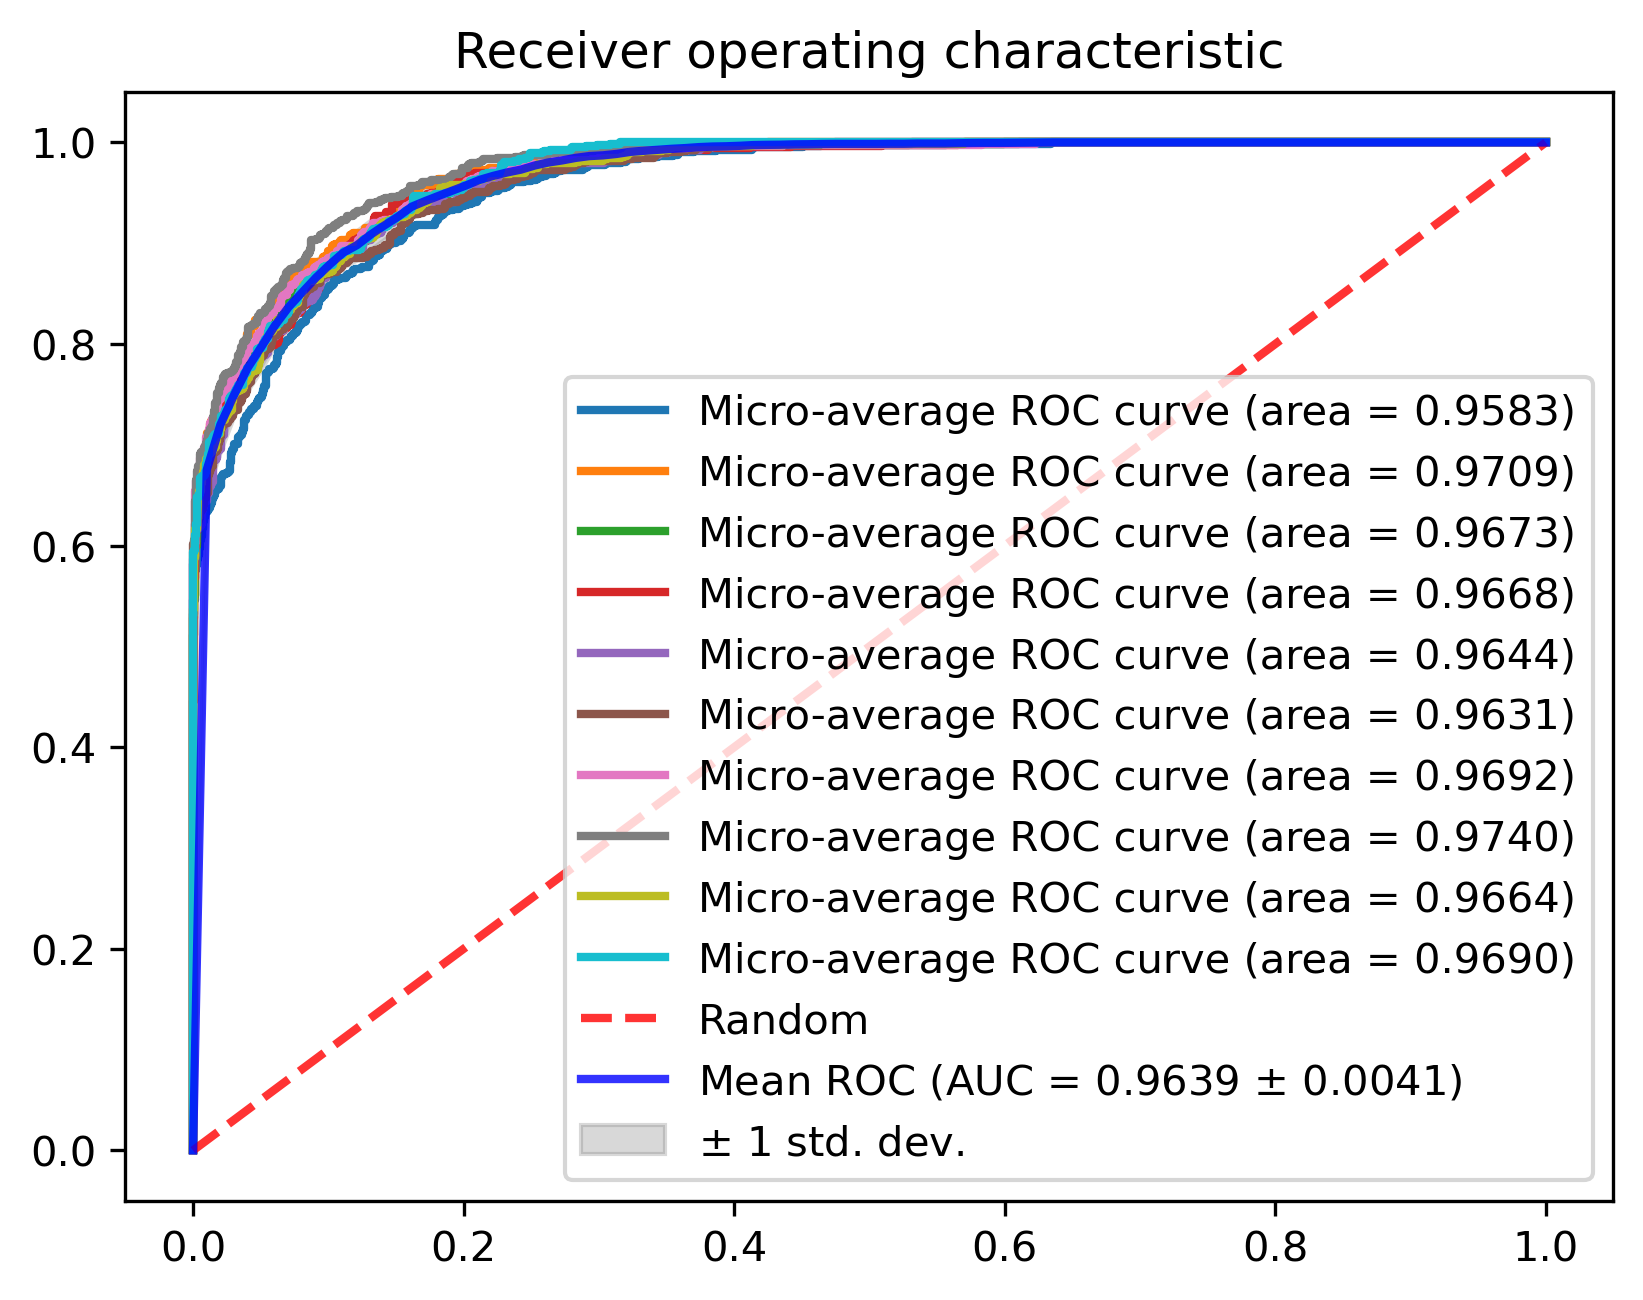

: 

In [3]:
suffix = 'greet_embedding_peryton'
latent = np.load('./sign/latent_comparison/' + suffix + '.npy')
latent_m, latent_d = latent[:A.shape[0],:], latent[A.shape[0]:,:]
# cross validation
tprs = []
aucs = []
mean_fpr_ = np.linspace(0, 1, 100)
fig, ax = plt.subplots(dpi=300)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
iter_ = 0  # control each iterator
sum_score = 0
out = []
test_label_score = {}

for j, (train_index, test_index) in enumerate(kf.split(samples)):
    print('############ {} fold #############'.format(j))
    out.append([train_index, test_index])
    iter_ = iter_ + 1
    train_samples = samples[train_index, :]
    test_samples = samples[test_index, :]

    vec_len1 = latent_m.shape[1]
    vec_len2 = latent_d.shape[1]
    train_n = train_samples.shape[0]
    train_feature = np.zeros([train_n, vec_len1 + vec_len2])
    train_label = np.zeros([train_n])

    for i in range(train_n):
        train_feature[i, 0: vec_len1] = latent_m[train_samples[i, 0], :]
        train_feature[i, vec_len1: (vec_len1 + vec_len2)] = latent_d[train_samples[i, 1], :]
        train_label[i] = train_samples[i, 2]

    test_N = test_samples.shape[0]
    test_feature = np.zeros([test_N, vec_len1 + vec_len2])
    test_label = np.zeros(test_N)

    for i in range(test_N):
        test_feature[i, 0: vec_len1] = latent_m[test_samples[i, 0], :]
        test_feature[i, vec_len1: (vec_len1 + vec_len2)] = latent_d[test_samples[i, 1], :]

        test_label[i] = test_samples[i, 2]

    # from sklearn.neural_network import MLPClassifier
    model = xgboost.XGBClassifier(eval_metric=['logloss', 'auc', 'error'], use_label_encoder=True)
    # model = LogisticRegression(random_state=0, solver='sag', multi_class='ovr', verbose=1, max_iter=500)
    # model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
    # model = MLPClassifier(hidden_layer_sizes=(512, 64, 16), random_state=42)
    model.fit(train_feature, train_label)
    pre_test_proba = model.predict_proba(test_feature)
    y_test_binary = np.array([1 if i == k else 0 for i in test_label for k in [-1, 0, 1]]).reshape(-1, 3)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_binary[:, i], pre_test_proba[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    fpr["macro"] = all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
    temp_mean_tpr = np.zeros_like(all_fpr)
    # 通过trapezoidal规则计算Macro-average ROC曲线和AUC值
    for i in range(3):
        temp_mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    temp_mean_tpr /= 3
    tpr["macro"] = temp_mean_tpr
    roc_auc["macro"] = macro_auc = metrics.auc(all_fpr, temp_mean_tpr)

    # 计算Micro-average ROC曲线和AUC值
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test_binary.ravel(), pre_test_proba.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

    ax.plot(fpr["micro"], tpr["micro"], color=colors[j], lw=2,
            label='Micro-average ROC curve (area = {0:0.4f})'.format(roc_auc["micro"]))
    # ax.plot(fpr["macro"], tpr["macro"], color=colors[j], linestyle='--', lw=2,
    #         label='Macro-average ROC curve (fold{0}) (area = {1:0.4f})'.format(j, macro_auc))
    # for i in range(3):
    #     plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.4f) for class %d' % (roc_auc[i], i))

    interp_tpr = np.interp(mean_fpr_, fpr["micro"], tpr["micro"])
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc["micro"])

    test_label_score['fold '+str(j)] = [y_test_binary, pre_test_proba]

# np.save('./ablation/out/folds.npy', test_label_score)
folds = test_label_score
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Random', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr_, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr_, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr_, tprs_lower, tprs_upper, color='grey', alpha=.3,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic")
ax.legend(loc="lower right")
# plt.show()
# plt.savefig('./sign/fig1/micro_'+suffix+'.tiff', dpi=300)

## test macro

############ 0 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 1 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 2 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 3 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 4 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 5 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 6 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 7 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 8 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


############ 9 fold #############


/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


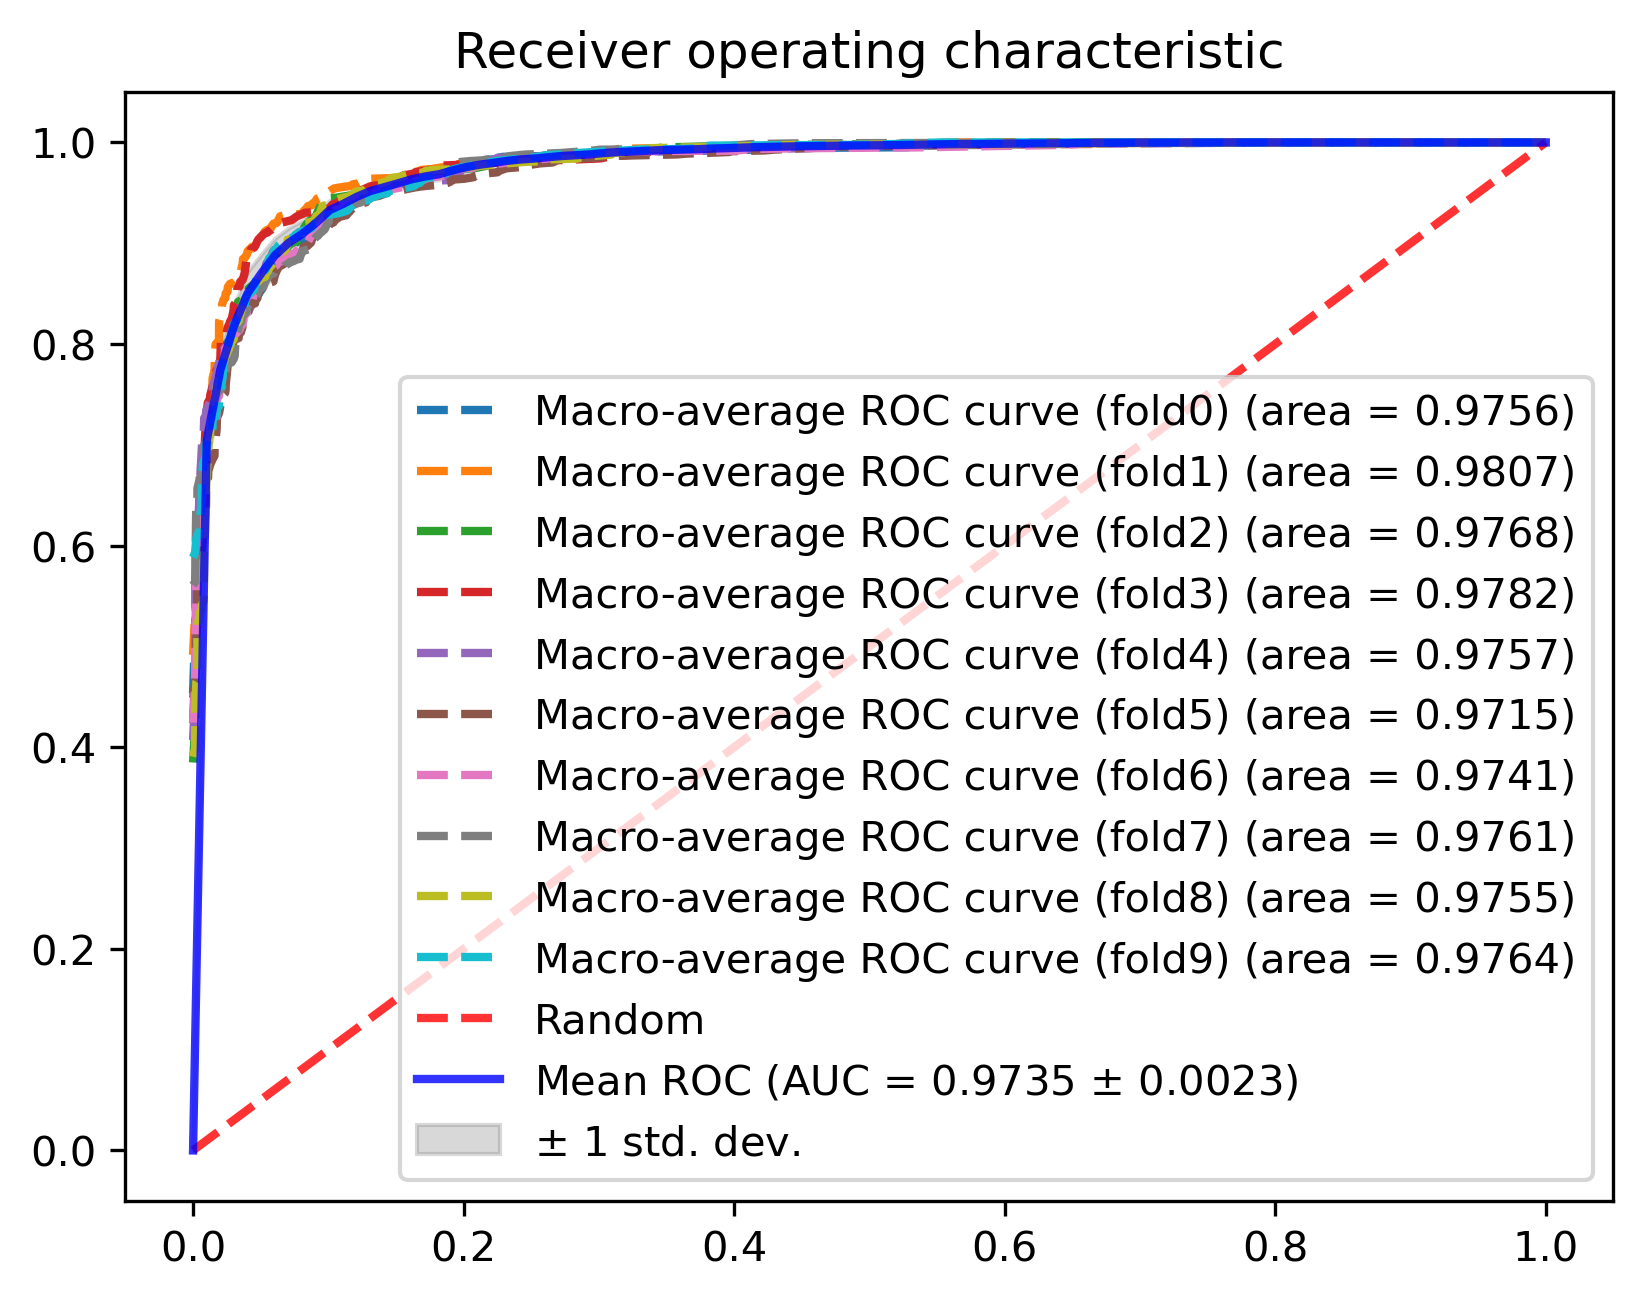

: 

In [3]:
suffix = 'peryton_sign2_dot_conv_leakyrelu_base_noeye'
latent = np.load('./sign/latent1/latent_' + suffix + '.npy')
latent_m, latent_d = latent[:A.shape[0],:], latent[A.shape[0]:,:]
# cross validation
tprs = []
aucs = []
mean_fpr_ = np.linspace(0, 1, 100)
fig, ax = plt.subplots(dpi=300)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
iter_ = 0  # control each iterator
sum_score = 0
out = []
test_label_score = {}

for j, (train_index, test_index) in enumerate(kf.split(samples)):
    print('############ {} fold #############'.format(j))
    out.append([train_index, test_index])
    iter_ = iter_ + 1
    train_samples = samples[train_index, :]
    test_samples = samples[test_index, :]

    vec_len1 = latent_m.shape[1]
    vec_len2 = latent_d.shape[1]
    train_n = train_samples.shape[0]
    train_feature = np.zeros([train_n, vec_len1 + vec_len2])
    train_label = np.zeros([train_n])

    for i in range(train_n):
        train_feature[i, 0: vec_len1] = latent_m[train_samples[i, 0], :]
        train_feature[i, vec_len1: (vec_len1 + vec_len2)] = latent_d[train_samples[i, 1], :]

        train_label[i] = train_samples[i, 2]

    test_N = test_samples.shape[0]
    test_feature = np.zeros([test_N, vec_len1 + vec_len2])
    test_label = np.zeros(test_N)

    for i in range(test_N):
        test_feature[i, 0: vec_len1] = latent_m[test_samples[i, 0], :]
        test_feature[i, vec_len1: (vec_len1 + vec_len2)] = latent_d[test_samples[i, 1], :]

        test_label[i] = test_samples[i, 2]
    model = xgboost.XGBClassifier(eval_metric=['logloss', 'auc', 'error'], use_label_encoder=True)
    model.fit(train_feature, train_label)

    pre_test_proba = model.predict_proba(test_feature)

    y_test_binary = np.array([1 if i == k else 0 for i in test_label for k in [-1, 0, 1]]).reshape(-1, 3)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_binary[:, i], pre_test_proba[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    fpr["macro"] = all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
    temp_mean_tpr = np.zeros_like(all_fpr)
    # 通过trapezoidal规则计算Macro-average ROC曲线和AUC值
    for i in range(3):
        temp_mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    temp_mean_tpr /= 3
    tpr["macro"] = temp_mean_tpr
    roc_auc["macro"] = macro_auc = metrics.auc(all_fpr, temp_mean_tpr)

    # 计算Micro-average ROC曲线和AUC值
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test_binary.ravel(), pre_test_proba.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

    # ax.plot(fpr["micro"], tpr["micro"], color=colors[j], lw=2,
    #         label='Micro-average ROC curve (area = {0:0.4f})'.format(roc_auc["micro"]))
    ax.plot(fpr["macro"], tpr["macro"], color=colors[j], linestyle='--', lw=2,
            label='Macro-average ROC curve (fold{0}) (area = {1:0.4f})'.format(j, macro_auc))
    # for i in range(3):
    #     plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.4f) for class %d' % (roc_auc[i], i))

    interp_tpr = np.interp(mean_fpr_, fpr["macro"], tpr["macro"])
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc["macro"])

    test_label_score['fold '+str(j)] = [y_test_binary, pre_test_proba]

# np.save('./sign/latent_database/peryton_sign2_folds.npy', test_label_score)
# folds = test_label_score
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Random', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr_, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr_, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr_, tprs_lower, tprs_upper, color='grey', alpha=.3,
                label=r'$\pm$ 1 std. dev.')
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic")
ax.legend(loc="lower right")
# plt.show()
# plt.savefig('./sign/fig1/micro_10fold_'+suffix+'.tiff', dpi=300)